# TP Python

## Simulation de variables aléatoires

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Ashley\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Exercice 1 - Bernoulli et binomiales

Le but de cet exercice est de créer des variables de Bernoulli de paramètre `p` fixé et de faire un test pour vérifier que les variables suivent bien une de loi de Bernoulli. On utilisera la commande `random.random()` qui est censée retourné une réalisation d’une variable aléatoire uniforme sur [0, 1].

#### 1. Ecrire une fonction `bernoulli(p)` qui retourne une réalisation d’une variable de Bernoulli de paramètre p à partir de la commande `random()`

In [3]:
import random

def bernoulli (p: float) -> int:
    r = random.random()
    if p >= r:
        return 1
    else:
        return 0

bernoulli(0.424)

0

#### 2. Ecrire une fonction `liste_bernoulli(n,p)` qui retourne une liste avec `n` réalisations d’une variable de Bernoulli de paramètre `p`.

In [4]:
def liste_bernoulli(n: int, p: int) -> list:
    li = []
    for i in range(n):
        li.append(bernoulli(p))
    return li

liste_bernoulli(10, 0.458)

[1, 0, 1, 1, 0, 1, 1, 1, 1, 0]

#### 3. Ecrire une fonction `frequence_bernoulli(n,p)` qui calcule la fréquence empirique de succès d’une variable de Bernoulli de paramètre `p` sur `n` réalisations.

In [5]:
def frequence_bernoulli(n: int, p: int) -> float:
    li = liste_bernoulli(n, p)
    succes = li.count(1)
    return succes / n

frequence_bernoulli(20, 0.36487)

0.3

#### 4. Proposer une fonction `binomiale(n,p)` pour créer une variable aléatoire binomiale de paramètre `(n, p)`.

In [6]:
def binomiale(n: int, p: int):
    return liste_bernoulli(n, p).count(1)

binomiale(10, 0.365497)

4

#### 5. Réaliser un histogramme sur un grand nombre `m` de réalisations de cette variable binomiale avec la commande l’histogramme de ces réalisations avec la commande `hist` de la bibliothèque `matplotlib.pyplot` que l’on chargera préalablement avec la commande import `matplotlib.pyplot` (Ou `import matplotlib.pyplot as plt` si on veut avoir `plt` (ou autre chose) comme raccourci).

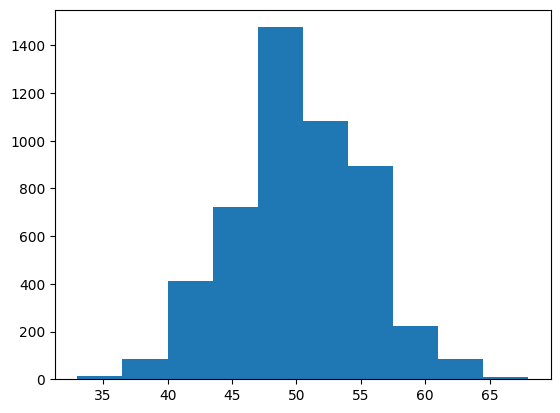

In [7]:
import matplotlib.pyplot as plt

def histo(m: int, n: int, p: int):
    binom = []
    for i in range(m):
        binom.append(binomiale(n, p))
    plt.hist(binom)
    plt.show()

histo(5000, 100, 0.5)

### Exercice 2 - Monty-Hall

Dans le jeu télévisé "Monthy Hall", le candidat se trouve face à trois portes. Derrière deux d’entre elles, se trouve une chèvre et derrière la troisième se trouve une voiture. Il choisit une porte, le présentateur ouvre une des deux autres portes (où se trouve forcément une chèvre) et laisse la possibilité au candidat de changer de porte. Le candidat valide ou change son choix puis la porte choisie s’ouvre et le candidat repart avec la chèvre ou la voiture selon ce sur quoi la porte s’est ouverte.

***Quelle est la meilleure stratégie : Conserver le premier choix ou le changer ?***

On souhaite tester empiriquement ces deux stratégies et comparer avec ce que l’on avait trouvé théoriquement. On supposera que la porte derrière laquelle se trouve la voiture est tirée au hasard de manière uniforme parmi les trois portes.

On pourra utiliser la commande `randint(i,j)` qui retourne un nombre entier aléatoire tiré de manière uniforme entre `i` et `j`

#### 1. Ecrire une fonction `strategie_conserve()` qui retourne l’issue aléatoire d’une expérience où l’on conserve la porte choisie à la première étape. Le résultat sera 1 si l’expérience est gagnante et 0 sinon.

In [8]:
def strategie_conserve() -> int:
    portes = ['voiture','chevre','chevre']
    choix = random.randint(0, 2)
    if portes[choix] == 'voiture':
        return 1
    return 0

strategie_conserve()

0

#### 2. Écrire une fonction `strategie_change()` qui retourne l’issue aléatoire d’une expérience où l’on change la porte choisie à la première étape. Le résultat sera 1 si l’expérience est gagnante et 0 sinon

In [9]:
def strategie_change() -> int:
    portes = ['voiture','chevre','chevre']
    # choix aleatoire entre les portes
    choix = random.randint(0, len(portes)-1)

    # on revele une autre porte avec une chevre
    if choix == 2:
        porteChevre = 1
        portes.pop(porteChevre)
        choix = 1 # pour ne pas depasser les bornes
    else:
        porteChevre = 2
        portes.pop(porteChevre)
    
    # on change le choix entre les portes non decouvertes
    choix = (choix + 1) % len(portes)
    
    if portes[choix] == 'voiture':
        return 1
    return 0

strategie_change()

1

#### 3. Écrire une fonction `frequence_conserve(n)` qui retourne la fréquence de gain pour `n` réalisation de la stratégie où l’on conserve la porte choisie à la première étape

In [10]:
def frequence_conserve(n: int) -> float:
    li = []
    for i in range(n):
        li.append(strategie_conserve())
    return li.count(1) / n

frequence_conserve(1000)

0.305

#### 4. Ecrire une fonction `frequence_change(n)` qui retourne la fréquence de gain pour `n` réalisations de la stratégie où l’on change la porte choisie à la première étape

In [11]:
def frequence_change(n: int) -> float:
    li = []
    for i in range(n):
        li.append(strategie_change())
    return li.count(1) / n

frequence_change(1000)

0.668

#### 5. Comparer les résultats pour un grand nombre `n` de réalisations de l’expérience avec le résultat obtenu en théorie.

In [12]:
n = 10000

print("Comparaison avec n = 10 000 :")
print("Conserver le choix : \t", str(frequence_conserve(n)*100)+"%")
print("Changer le choix : \t", str(frequence_change(n)*100)+"%")

Comparaison avec n = 10 000 :
Conserver le choix : 	 33.46%
Changer le choix : 	 66.12%


6. Quelle est la meilleure stratégie ?

>La meilleure stragtégie est de modifier son choix : en effet, puisque l'on nous révèle une porte avec une chèvre et que l'on choisit la dernière porte non révélée ou déjà choisie, le seul cas où l'on perd est celui où l'on avait choisi la voiture, i.e 1/3 chances.

### Exercice 3 - Simulation de variable exponentielle

Dans cet exercice, on souhaite créer une fonction `exponentielle(λ)` qui retourne le résultat aléatoire d’une variable exponentielle de paramètre `λ` à partir d’une variable aléatoire $X$ sur [0, 1] (obtenue par la commande `random.random()`). Nous allons en fait utiliser une méthode générale. On considère une fonction de répartition $F$ d’une loi de probabilité. On définit la variable aléatoire $Y = F^{−1}(X)$.

#### 1. Montrer que la fonction de répartition de $Y$ est $f$ , c’est-à-dire que $P(Y ≤ x) = f(x)$ pour tout $x ∈ R$

Par définition, $Y = F^{-1}(X)$, où $X$ est une v.a de loi uniforme sur $[0, 1]$.

Donc on a $X = F(Y)$.

$$ P(Y \leq x) = P(F^{-1}(X) \leq x) $$

Comme $F$ est strictement croissante, $F^{-1}$ l'est également. Donc
$$ P(F^{-1}(X) \leq x) = P(X \leq F(x)) $$

Puisque $X$ suit une loi uniforme sur $[0, 1]$, on a $P(X \leq F(x)) = F(x)$.

Donc on a
$$ P(Y \leq x) = F(x) $$

#### 2. Si f est la fonction de répartition d’une variable aléatoire exponentielle alors $F^{−1}(x) = −ln(x−1) / λ$ pour tout $x ∈ [0, 1]$.

#### 3. Ecrire la fonction `exponentielle(λ)`

In [53]:
import math

def exponentielle(l: float) -> float:
    if l <= 0:
        print("Le paramètre λ doit être strictement positif.")
        return -1
    U = random.random()
    Y = -math.log(1 - U) / l
    return Y

# Exemple d'utilisation
l = 2.0
print("Valeur exponentielle générée avec λ =", l, ":", exponentielle(l))

Valeur exponentielle générée avec λ = 2.0 : 0.21082503880199507


#### 4. Réaliser un grand nombre n de réalisations (par exemple n = 10000) de cette variable pour un λ fixé (par exemple λ = 1) puis tracer l’histogramme de ces réalisations avec la commande hist de la bibliothèque matplotlib.pyplot Comme précédemment.

Cet histogramme donnera une densité empirique (multipliée par n) que l’on comparera avec la vraie densité obtenue avec la commande plot de matplotlib.

On se réfèrera à https://matplotlib.org pour la documentation sur matplolib.

In [204]:
def exp_theorique (l: float, x: float) -> float:
    if x < 0:
        return 0
    return math.exp(-l * x)

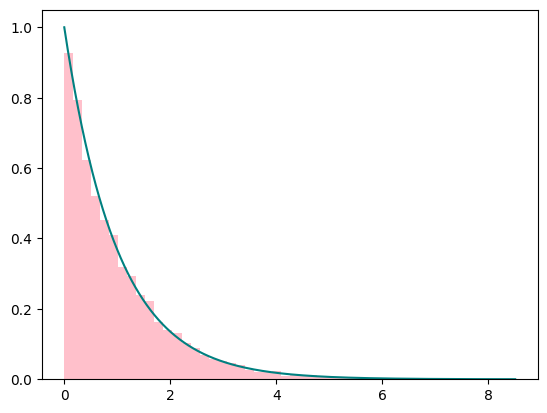

In [ ]:
import numpy as np

l = 1.0
n = 10000

hist = [exponentielle(l) for i in range(n)]
y = np.linspace(0, max(hist), n) # genere n chiffres entre 0 et max(histo)

# on applique la fct pour calculer la loi exponentielle
densite_theorique = [exp_theorique(l, y[i]) for i in range(n)] # exp(-λx)
densite_theorique = np.multiply(densite_theorique, l)          # l * exp(-λx)

plt.plot(y, densite_theorique, color="teal")
plt.hist(hist, bins=50, density=True, color="pink")
plt.show()

### Exercice 4 - Méthode de Monte-Carlo

La méthode de Monte-Carlo est une méthode aléatoire pour calculer des intégrales, par exemple des aires. On va utiliser cette méthode pour calculer l’aire d’un disque de rayon 1 pour obtenir une approximation de **π**.

En effet, un disque de rayon 1 a pour aire **π × 1<sup>2</sup>** = π. Pour des raisons pratiques, on va calculer l’aire du quart de disque de centre 0 et de rayon 1 dans le plan. On va tirer au hasard n points dans le carré [0, 1]<sup>2</sup> et compter ceux qui tombent à l’intérieur du disque.

Pour de grandes valeurs de `n`, on s’attend à ce que la proportion de ceux qui tombent dans le disque soit égale aux rapports des aires du quart de disque et du carré, c’est-à-dire **π/4**. On multipliera cette proportion par 4 pour obtenir une approximation de **π**.

#### 1. Tirer n (par exemple n = 100 ou 1000) points au hasard dans le carré [0, 1]<sup>2</sup>. Les coordonnées (x, y) de ces points suivront des variables aléatoires uniformes sur [0, 1].

In [15]:
def tirage(n: int) -> list:
    x = []
    y = []
    for i in range(n):
        x.append(random.random())
        y.append(random.random())
    return (x, y)

coord = tirage(5)
x = coord[0]
y = coord[1]

print(x)
print(y)

[0.14322765329436882, 0.7852037462867958, 0.11456404133220743, 0.26590725162211437, 0.05924342964083029]
[0.9260687809295394, 0.4884756196022213, 0.9115133449016055, 0.04146758339159784, 0.9942145402419619]


#### 2. Afficher avec les commandes `scatter` et `plot` de la bibliothèque matplotlib ces n tirages ansi que le quart d’arc de cercle dans ce carré

In [16]:
import math

def arc_cercle(precision: int) -> list:
    a = []
    b = []
    for i in range(precision + 1):
        x = i / precision
        y = math.sqrt(1 - x**2)
        a.append(x)
        b.append(y)
    return [a, b]

circ = arc_cercle(10)
a = circ[0]
b = circ[1]

print(a)
print(b)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
[1.0, 0.99498743710662, 0.9797958971132712, 0.9539392014169457, 0.916515138991168, 0.8660254037844386, 0.8, 0.714142842854285, 0.5999999999999999, 0.4358898943540673, 0.0]


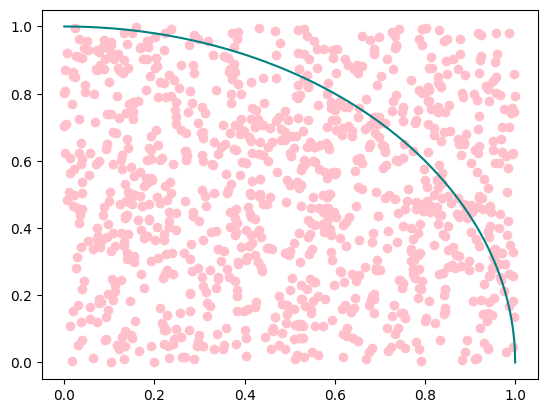

In [184]:
n = 1000
coord = tirage(n)

x = coord[0]
y = coord[1]
z = arc_cercle(n)

plt.scatter(x, y, color="pink")
plt.plot(z[0], z[1], color="teal", linewidth=1.5)
plt.show()

#### 3. Calculer la proportion de points à l’intérieur du carré et retourner une approximation de π. On utilisera que les points (x, y) à l’intérieur du disque satisfont l’inégalité x<sup>2</sup> + y<sup>2</sup> < 1.

In [18]:
n = 1000
coord = tirage(n)

def inside_circ (points: list, n: int) -> float:
    x = points[0]
    y = points[1]
    pointsInside = 0
    for i in range(len(x)):
        if (x[i]**2 + y[i]**2) < 1:
            pointsInside += 1
    return pointsInside / n

p = inside_circ(coord, n)

print("Proportion de points dans le cercle (n =", str(n)+") :", p*100, '%')
print("Apporximation de pi :", p*4)

Proportion de points dans le cercle (n = 1000) : 78.5 %
Apporximation de pi : 3.14
